In [2]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

3.6.0 |Anaconda 4.3.1 (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
1.11.3
0.19.2


## Summary Analysis: Did   TV ads  have any correlation with the outcomes in the 10 battleground states in 2016 presidential elections?
* The dataset was cleaned and a new column was added for ad length(Difference of ad end time and start time
* Also the sponsor party column was added to indicate which party sponsored the ad.
* Did a comparison of total Democratic party ad volume by message type(positive, negative and mixed) versus 
  republican party ad volume and also plotted the difference to get a better understanding of the gap. 
* The data showed  that Hillary outspent Trump in 8 of the 11 states by significant numbers. 
* In order to quantify the outcome, referred to an external dataset and collected data for the net difference in 
  republican margins from 2012 to 2016.
* Plotted the Difference in Ad volume of republican party against the difference in margins for republican party 
  on a scatter plot to see if there was any relationship.
* The points were all over and did not follow any particular pattern
* In 4 out of the 11 states,





In [3]:
df_trump_margins_volume = pd.read_pickle('./data/TV_AD_TRUMP_VOLUME_VICTORY_MARGINES_7.pkl')

In [4]:
df_trump_margins_volume

,2012 Percent margin,2012 Winner,2016 Percent margin,2016 Winner,Net Trump Margins,Comments,D,I,R,Trump Ad Difference
state,,,,,,,,,,
IA,5.81,D,9.41,R,15.22,changed D to R,36.76,0.77,12.17,-24.59
OH,2.97,D,8.07,R,11.04,changed D to R,62.76,0.01,32.06,-30.70
WI,6.94,D,0.76,R,7.70,changed D to R,12.40,NaN,23.64,11.24
PA,5.38,D,0.72,R,6.10,changed D to R,73.25,NaN,33.51,-39.74
NH,5.58,D,0.37,D,5.21,fell for D,25.16,NaN,18.73,-6.43
NV,6.68,D,2.42,D,4.26,margin fell for D,76.54,0.50,25.40,-51.14
NC,2.04,R,3.66,R,1.62,increased for R,45.05,NaN,14.42,-30.63
CO,5.36,D,4.91,D,0.45,margin fell for D,15.96,NaN,25.82,9.86
FL,0.88,D,1.19,R,0.31,increased for R,76.49,NaN,36.25,-40.24


In [5]:
df_trump_margins_volume.reset_index(inplace=True)

In [6]:
df_trump_margins_volume['state']

0     IA
1     OH
2     WI
3     PA
4     NH
5     NV
6     NC
7     CO
8     FL
9     VA
10    AZ
Name: state, dtype: object

0 IA
1 OH
2 WI
3 PA
4 NH
5 NV
6 NC
7 CO
8 FL
9 VA
10 AZ


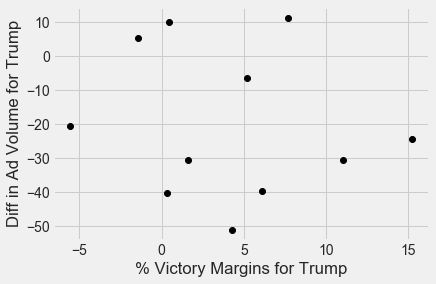

In [7]:
x = df_trump_margins_volume['Net Trump Margins']
y = df_trump_margins_volume['Trump Ad Difference']
plt.plot(x, y, 'o', color='black')
plt.xlabel('% Victory Margins for Trump')
plt.ylabel('Diff in Ad Volume for Trump')
z = df_trump_margins_volume['state']
for i,state in enumerate(z):
    print(i,state)

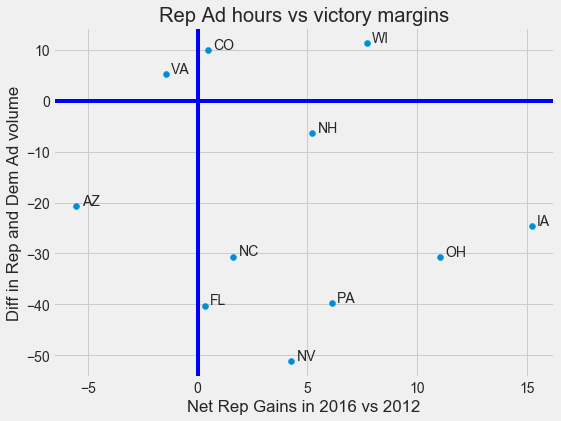

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
x = df_trump_margins_volume['Net Trump Margins']
y = df_trump_margins_volume['Trump Ad Difference']
ax.scatter(x, y)
z = df_trump_margins_volume['state']
ax.axhline(linewidth=4, color="b")
ax.axvline(linewidth=4, color="b") 

for i,state in enumerate(z):
    ax.annotate(state,(x[i]+0.25, y[i]+0.25))
ax.set(xlabel='Net Rep Gains in 2016 vs 2012' ,
       ylabel= 'Diff in Rep and Dem Ad volume',
       title = 'Rep Ad hours vs victory margins')    
plt.savefig('ana_final_pics/Rep Ad hours vs victory margins.png')

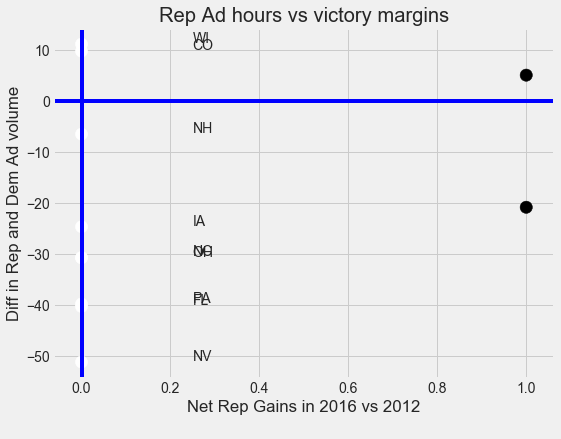

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
x = df_trump_margins_volume['Net Trump Margins']
y = df_trump_margins_volume['Trump Ad Difference']
x = np.where(np.array(x) > 0, 0, 1)
ax.scatter(x, y, c=x, s=150,)
z = df_trump_margins_volume['state']
ax.axhline(linewidth=4, color="b")
ax.axvline(linewidth=4, color="b") 

for i,state in enumerate(z):
    ax.annotate(state,(x[i]+0.25, y[i]+0.25))
ax.set(xlabel='Net Rep Gains in 2016 vs 2012' ,
       ylabel= 'Diff in Rep and Dem Ad volume',
       title = 'Rep Ad hours vs victory margins')    
#plt.savefig('proposal_pics/Rep Ad hours vs victory margins.png')


In [9]:
df_trump_margins_volume.corr(method="pearson")

,2012 Percent margin,2016 Percent margin,Net Trump Margins,D,I,R,Trump Ad Difference
2012 Percent margin,1.000000,-0.097077,-0.053345,-0.361866,0.834195,-0.447728,0.236420
2016 Percent margin,-0.097077,1.000000,0.398893,-0.132393,0.015999,-0.289685,0.025804
Net Trump Margins,-0.053345,0.398893,1.000000,0.223447,0.220070,0.286420,-0.141186
D,-0.361866,-0.132393,0.223447,1.000000,-0.508578,0.659363,-0.931983
I,0.834195,0.015999,0.220070,-0.508578,1.000000,-0.937979,0.055892
R,-0.447728,-0.289685,0.286420,0.659363,-0.937979,1.000000,-0.341978
Trump Ad Difference,0.236420,0.025804,-0.141186,-0.931983,0.055892,-0.341978,1.000000


See a negative correlation of -0.14.